# Problem
In our mini case brief, we highlight the problem, root cause analysis, and key research questions.
    

# Data
This script is for data preprocessing and initial analysis in a customer churn prediction project. It loads necessary libraries, prepares the dataset, and performs basic data cleaning steps.

Libraries:
* pandas: For data manipulation and handling missing values.
* numpy: For numerical operations.
* scikit-learn: For partitioning the dataset, training models, and evaluation.
* matplotlib: For data visualization.

Step 1: Load the Dataset
* Reads the customer churn dataset from a CSV file.
* The dataset should include customer information relevant for churn prediction.

Step 2: Data Cleaning and Preprocessing
* Converts the 'Churn' column to a binary outcome (1 for 'Yes', 0 for 'No') for classification.
* Removes unnecessary columns (e.g., 'customerID') to focus on relevant features.
* Imputes missing values in numeric columns using the median value. This is crucial to ensure the dataset is complete for modeling.
* Converts categorical variables to dummy variables for better handling in predictive models.

Importance:
* This preprocessing is vital to prepare the data for machine learning models.
* Clean and well-structured data improves model accuracy and performance.
* Proper handling of missing values and categorical variables ensures that the model training process is robust and reliable.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'Telco-Customer-Churn.csv' with the path to your dataset
dataset_path = 'Telco-Customer-Churn.csv'
dataset = pd.read_csv(dataset_path)

# Display the first few rows of the dataset for inspection
print(dataset.head())

# Step 2: Data Cleaning and Preprocessing
# Convert 'Churn' column to a binary outcome (1 for 'Yes', 0 for 'No')
label_encoder = LabelEncoder()
dataset['Churn'] = label_encoder.fit_transform(dataset['Churn'])  # 'Yes' -> 1, 'No' -> 0

# Remove unnecessary columns (e.g., customerID)
if 'customerID' in dataset.columns:
    dataset = dataset.drop(columns=['customerID'])

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# Impute missing values in numeric columns using the median
for col in dataset.select_dtypes(include=[np.number]).columns:
    dataset[col] = dataset[col].fillna(dataset[col].median())

# Convert categorical variables to dummy variables
dataset = pd.get_dummies(dataset, drop_first=True)

# Display the cleaned dataset for verification
print(dataset.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Model
This section of the script performs data splitting, model training, prediction, and evaluation for a logistic regression model aimed at predicting customer churn.
    
* Step 3: Split the Dataset into Training and Testing Sets
  * The dataset is split into training (80%) and testing (20%) sets using scikit-learn.
  * A random state is set for reproducibility, ensuring consistent results across runs.
  * The training set is used to train the model, while the testing set is used to evaluate it.
  
* Step 4: Fit the Logistic Regression Model
  * A logistic regression model is trained using the training data.
  * The model predicts the probability of customer churn based on the features in the dataset.
  * This step is crucial to identify the relationship between predictors and the outcome (Churn).
  
* Step 5: Model Summary
  * Since scikit-learn's LogisticRegression does not provide a summary directly, we will print the coefficients and intercept of the model to understand the relationship between variables and churn.
  
* Step 6: Make Predictions on the Test Data
  * The model is used to make predictions on the test data.
  * Probabilities of churn are converted to binary predictions (1 for 'Yes', 0 for 'No') using a threshold of 0.5.
  
* Step 7: Evaluate Model Performance
  Here is a line describing the metrics:
  * Accuracy, Precision, Recall, and F1 Score:** Measure the model's performance by evaluating the proportion of correct predictions, the reliability of positive predictions, the ability to identify actual positive cases, and the balance between precision and recall.
  * Confusion Matrix: Evaluates the model's accuracy, sensitivity, and specificity. It compares the predicted labels with the actual labels in the test set.
  * ROC and AUC: ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are used to assess the model's ability to distinguish between churners and non-churners.
  * The ROC curve is plotted to visually inspect the model's performance.
  
* Importance:
  * Splitting the data into training and testing sets helps in evaluating the model's generalization.
  * Logistic regression is a commonly used method for binary classification tasks like churn prediction.
  * Model evaluation through metrics, confusion matrix, ROC, and AUC provides insights into model performance.
  * This process is key for building a reliable predictive model to support business decisions.
    

In [ ]:
# Step 3: Split the dataset into training and testing sets
# Set random state for reproducibility
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=123, stratify=dataset['Churn'])

# Separate features and target variable
X_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']

# Step 4: Fit the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Model Summary
# Since scikit-learn's LogisticRegression does not provide a summary directly, we print coefficients and intercept
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
intercept = model.intercept_[0]
print("Coefficients:")
print(coefficients)
print("Intercept:", intercept)

# Step 6: Make predictions on the test data
probabilities = model.predict_proba(X_test)[:, 1]
predictions = (probabilities > 0.5).astype(int)

Coefficients:
SeniorCitizen                            0.321513
tenure                                  -0.064248
MonthlyCharges                           0.005931
TotalCharges                             0.000335
gender_Male                              0.016725
Partner_Yes                              0.004282
Dependents_Yes                          -0.216023
PhoneService_Yes                        -0.437277
MultipleLines_No phone service           0.238926
MultipleLines_Yes                        0.167904
InternetService_Fiber optic              0.589563
InternetService_No                      -0.109082
OnlineSecurity_No internet service      -0.109082
OnlineSecurity_Yes                      -0.568688
OnlineBackup_No internet service        -0.109082
OnlineBackup_Yes                        -0.187956
DeviceProtection_No internet service    -0.109082
DeviceProtection_Yes                    -0.168171
TechSupport_No internet service         -0.109082
TechSupport_Yes                     

In [ ]:
# Step 7: Model Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate Precision
precision = precision_score(y_test, predictions)

# Calculate Recall
recall = recall_score(y_test, predictions)

# Calculate F1 Score
f1 = f1_score(y_test, predictions)

# Print all the metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance Metrics:
Accuracy: 0.80
Precision: 0.64
Recall: 0.52
F1 Score: 0.57


**How to Interpret:**  
- **Accuracy**: High accuracy indicates that the model correctly predicts most of the cases, but it might be misleading if the dataset is imbalanced.
- **Precision**: High precision means that when the model predicts a customer will churn, it is usually correct. This is useful when the cost of false positives is high.
- **Recall**: High recall means the model successfully identifies most of the actual churners. Important when missing a positive case (false negative) is costly.
- **F1 Score**: A higher F1 score indicates a good balance between precision and recall. It's particularly valuable when you need to strike a balance between precision and recall, especially in the context of imbalanced datasets.

Confusion Matrix:
[[928 107]
 [181 193]]


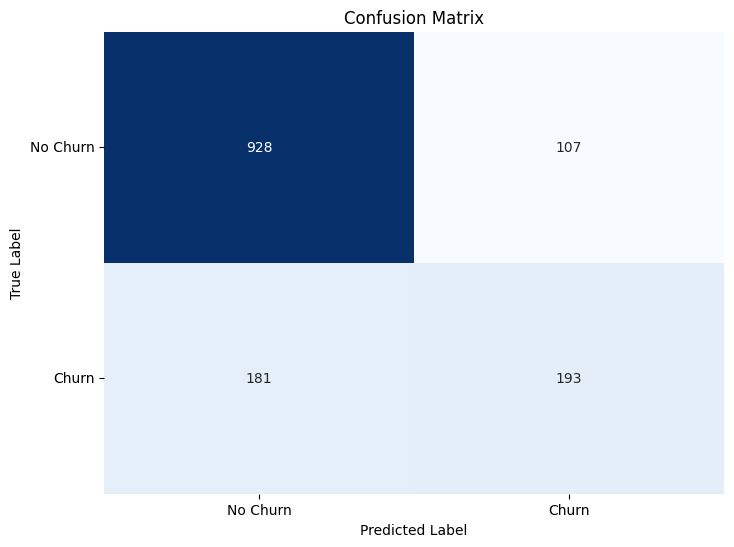

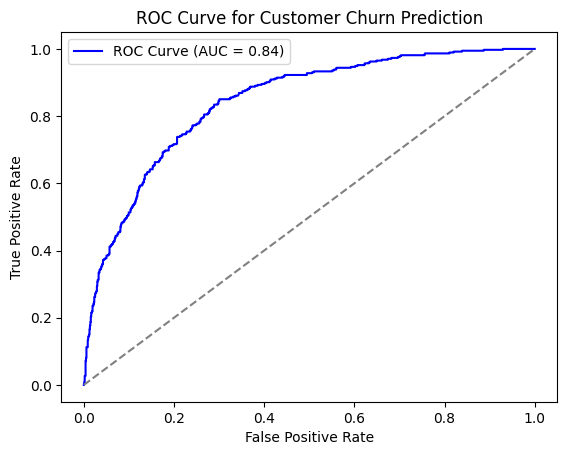

In [ ]:
# Step 8: Evaluate Model Performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'], rotation=0)
plt.show()

# ROC and AUC
roc_auc = roc_auc_score(y_test, probabilities)
fpr, tpr, _ = roc_curve(y_test, probabilities)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Customer Churn Prediction')
plt.legend()
plt.show()

**How to Interpret:**  
- **Confusion Matrix**: This matrix provides a summary of prediction results by showing the counts of true positives (correctly predicted churn cases), true negatives (correctly predicted non-churn cases), false positives (non-churn predicted as churn), and false negatives (churn predicted as non-churn).  
  - **True Positives (TP)** (Bottom-right quadrant): The model correctly predicts churn.  
  - **True Negatives (TN)** (Top-left quadrant): The model correctly predicts no churn.  
  - **False Positives (FP)** (Top-right quadrant): The model incorrectly predicts churn when there is no churn (Type I error).  
  - **False Negatives (FN)** (Bottom-left quadrant): The model incorrectly predicts no churn when there is churn (Type II error).  
  - **Interpretation**: A good model will have high values for TP and TN (bottom-right and top-left quadrants) and low values for FP and FN (top-right and bottom-left quadrants).

- **ROC Curve and AUC**:  
  - **ROC Curve**: This is a graphical representation of the model's ability to distinguish between the positive (churn) and negative (no churn) classes. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The closer the curve is to the top-left corner, the better the model's performance.
  - **AUC (Area Under the Curve)**: This value represents the likelihood that the model ranks a randomly chosen positive instance higher than a randomly chosen negative one.  
  - **Interpretation**: An AUC value of 0.5 suggests no discrimination (random guessing), while a value closer to 1 indicates excellent performance. An AUC closer to 1 means the model is better at distinguishing between churners and non-churners.

# Impact
Given our findings, go back to the mini case brief and answer our key research questions using the above analysis and visualizations.
    